Calculating approximation for degree m = 99
Plot saved as 'taylor_approximation.png'
Running Error and Time Analysis
Calculating approximation for degree m = 50
Calculating approximation for degree m = 60
Calculating approximation for degree m = 70
Calculating approximation for degree m = 80
Calculating approximation for degree m = 90
Calculating approximation for degree m = 100
   m_degree         error  time_seconds
0        50  4.949573e+01      0.016577
1        60  1.754248e-03      0.020035
2        70  1.319990e-07      0.024340
3        80  1.394495e-07      0.029998
4        90  1.394495e-07      0.030829
5       100  1.394495e-07      0.033682

Results saved to 'taylor_values.csv'


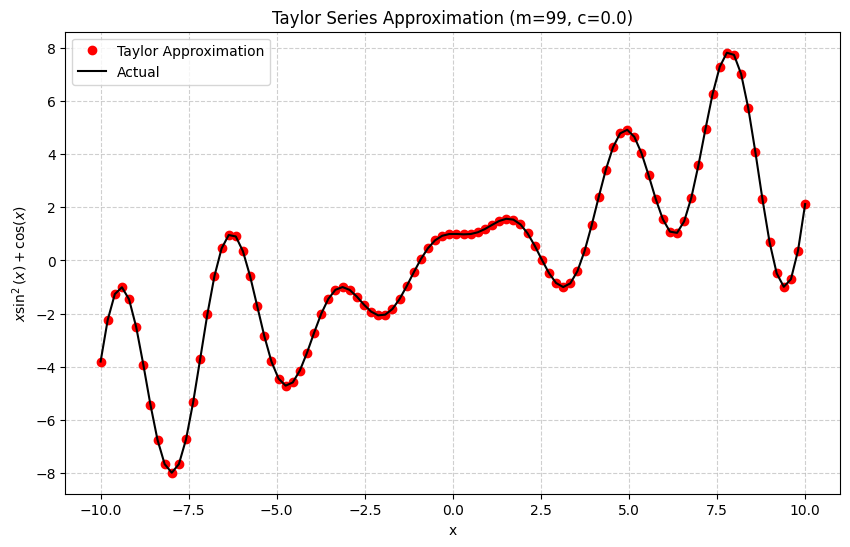

In [3]:
import sympy
import math
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
#Taylor Series Approximation Function

def get_taylor_approximation(sym_func, x_symbol, start, end, num_points, degree, fixed_c):

    #Computes the Taylor series approximation for a symbolic function.
     
    print(f"Calculating approximation for degree m = {degree}")
    
    taylor_series = sympy.Float(0.0) # Initialize the series sum
    current_derivative = sym_func
    
    # Sum the series from n=0 to m
    for n in range(degree + 1):
        # f^(n)(c)
        f_n_at_c = current_derivative.subs(x_symbol, fixed_c)
        
        # (f^(n)(c) / n!) * (x - c)^n
        term = (f_n_at_c / math.factorial(n)) * (x_symbol - fixed_c)**n
        taylor_series += term
        
        # Get the next derivative f^(n+1) for the next loop
        current_derivative = sympy.diff(current_derivative, x_symbol)
        
    # Convert the sympy expression into a numeric function
    numeric_approximator = sympy.lambdify(x_symbol, taylor_series, 'numpy')
    
    # Generate the x-values for the domain
    x_vals = np.linspace(start, end, num_points)
    # Computes the y-values using the numeric function
    y_approx = numeric_approximator(x_vals)
    
    return x_vals, y_approx

# Error and Time Analysis Function
def analyze_taylor_error(sym_func, x_symbol, start, end, num_points, fixed_c, 
                          initial_degree, final_degree, degree_step):
    #Analyzes the error and computation time for various Taylor series degrees.

    # Get the true function values for error comparison
    f_numeric = sympy.lambdify(x_symbol, sym_func, 'numpy')
    x_vals = np.linspace(start, end, num_points)
    y_actual = f_numeric(x_vals)
    
    results = []
    
    # Loop from initial_degree to final_degree
    for m in range(initial_degree, final_degree + 1, degree_step):
        
        #Time the approximation computation 
        start_time = time.time()
        
        # Use the function from Task 3.1
        _, y_approx = get_taylor_approximation(
            sym_func, x_symbol, start, end, num_points, m, fixed_c
        )
        
        end_time = time.time()
        computation_time = end_time - start_time
        
        #Compute the sum of absolute differences 
        error = np.sum(np.abs(y_actual - y_approx))
        
        # Store results
        results.append({
            'm_degree': m,
            'error': error,
            'time_seconds': computation_time
        })
        
    # Create and save the DataFrame
    df = pd.DataFrame(results)
    df.to_csv('taylor_values.csv', index=False)
    return df

# Main program
if __name__ == "__main__":
    
    #Define symbolic function and variable
    x = sympy.symbols('x')
    
    # f(x) = x*sin(x)^2 + cos(x) 
    f_sym = x * sympy.sin(x)**2 + sympy.cos(x) 
    

    #Run and Plot Approximation
    # Set parameters
    START = -10.0
    END = 10.0
    NUM_POINTS = 100
    DEGREE_M = 99  # m=99 for 100 terms
    C_POINT = 0.0
    
    #Get the approximation
    x_domain, y_approx = get_taylor_approximation(
        f_sym, x, START, END, NUM_POINTS, DEGREE_M, C_POINT
    )
    
    # Get the actual function values
    f_numeric = sympy.lambdify(x, f_sym, 'numpy')
    y_actual = f_numeric(x_domain)
    
    #Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_domain, y_approx, 'ro', label='Taylor Approximation')
    plt.plot(x_domain, y_actual, 'k-', label='Actual')
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel(r'$x \sin^2(x) + \cos(x)$')
    plt.title(f'Taylor Series Approximation (m={DEGREE_M}, c={C_POINT})')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.savefig('taylor_approximation.png')
    print("Plot saved as 'taylor_approximation.png'")
    


    #Run Error/Time Analysis
    print("Running Error and Time Analysis")
    
    # Set parameters
    INIT_DEG = 50
    FINAL_DEG = 100
    STEP_DEG = 10
    
    analysis_df = analyze_taylor_error(
        f_sym, x, START, END, NUM_POINTS, C_POINT,
        INIT_DEG, FINAL_DEG, STEP_DEG
    )
    
    print(analysis_df)
    print("\nResults saved to 'taylor_values.csv'")